In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore

In [3]:
df=pd.read_csv("E:\\baseball.csv")
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


loaded the abalone dataset.

In [685]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Earned runs average  coloumn is a float datatype remaing all are integer data type

In [423]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [200]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


maximum wins 100 and minimum wins 63.It has minimum error value as 75 and maximum as 126

In [201]:
df.shape

(30, 17)

It has 17 coloumns and 30 rows

In [202]:

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [203]:
col=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']
for i in col:
    print(df.loc[df[i]==""])

Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SH

no empty space

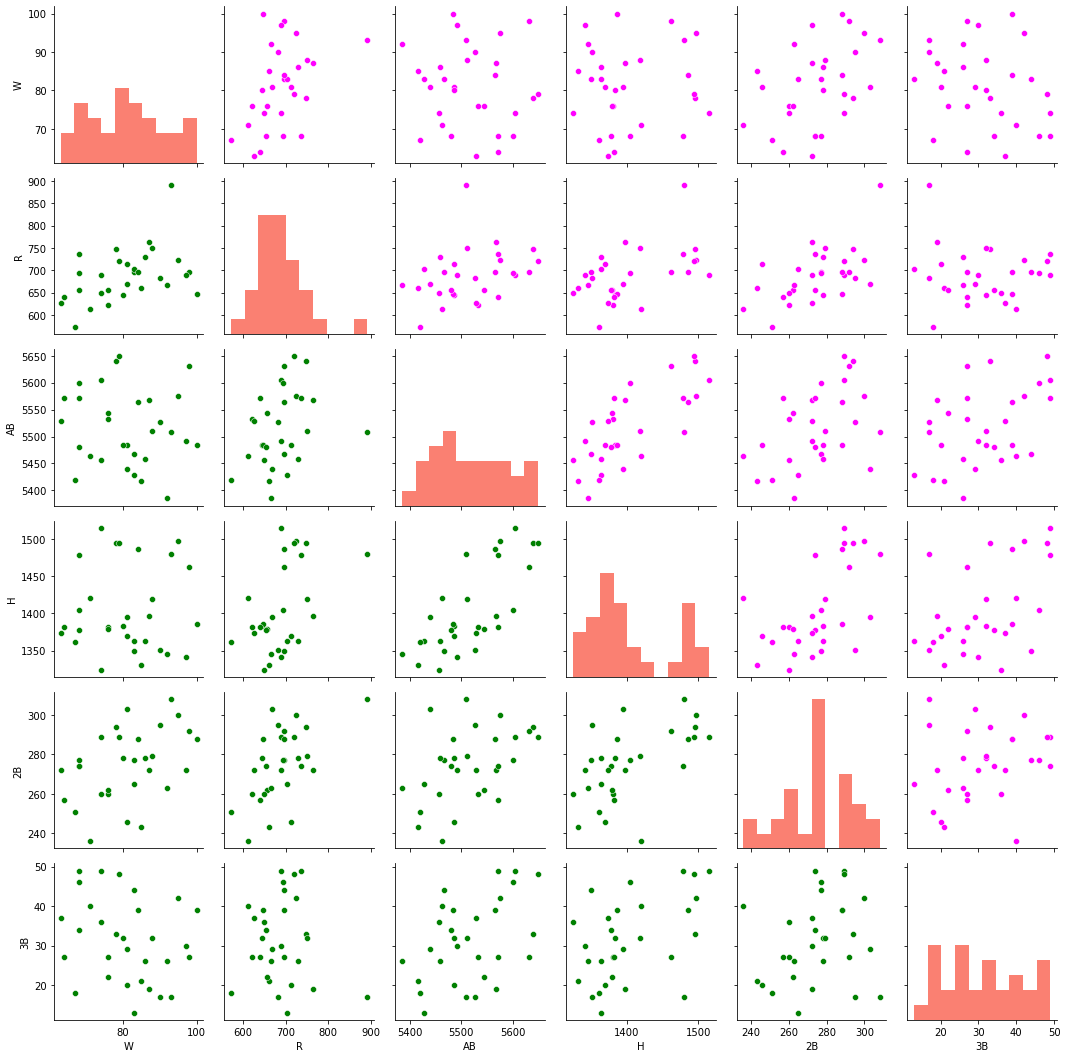

In [204]:
cols=['W', 'R', 'AB', 'H', '2B', '3B']
g = sns.PairGrid(df[cols])
g.map_upper(sns.scatterplot,color=(1,0,1))
g.map_lower(sns.scatterplot, color="green")
g.map_diag(plt.hist,color='salmon')
plt.show()

The data points of the features R and AB showing an uphill pattern as you move from left to right so it has positive relationship.
The data points of the features R and w showing an uphill pattern as you move from left to right so it has positive relationship.


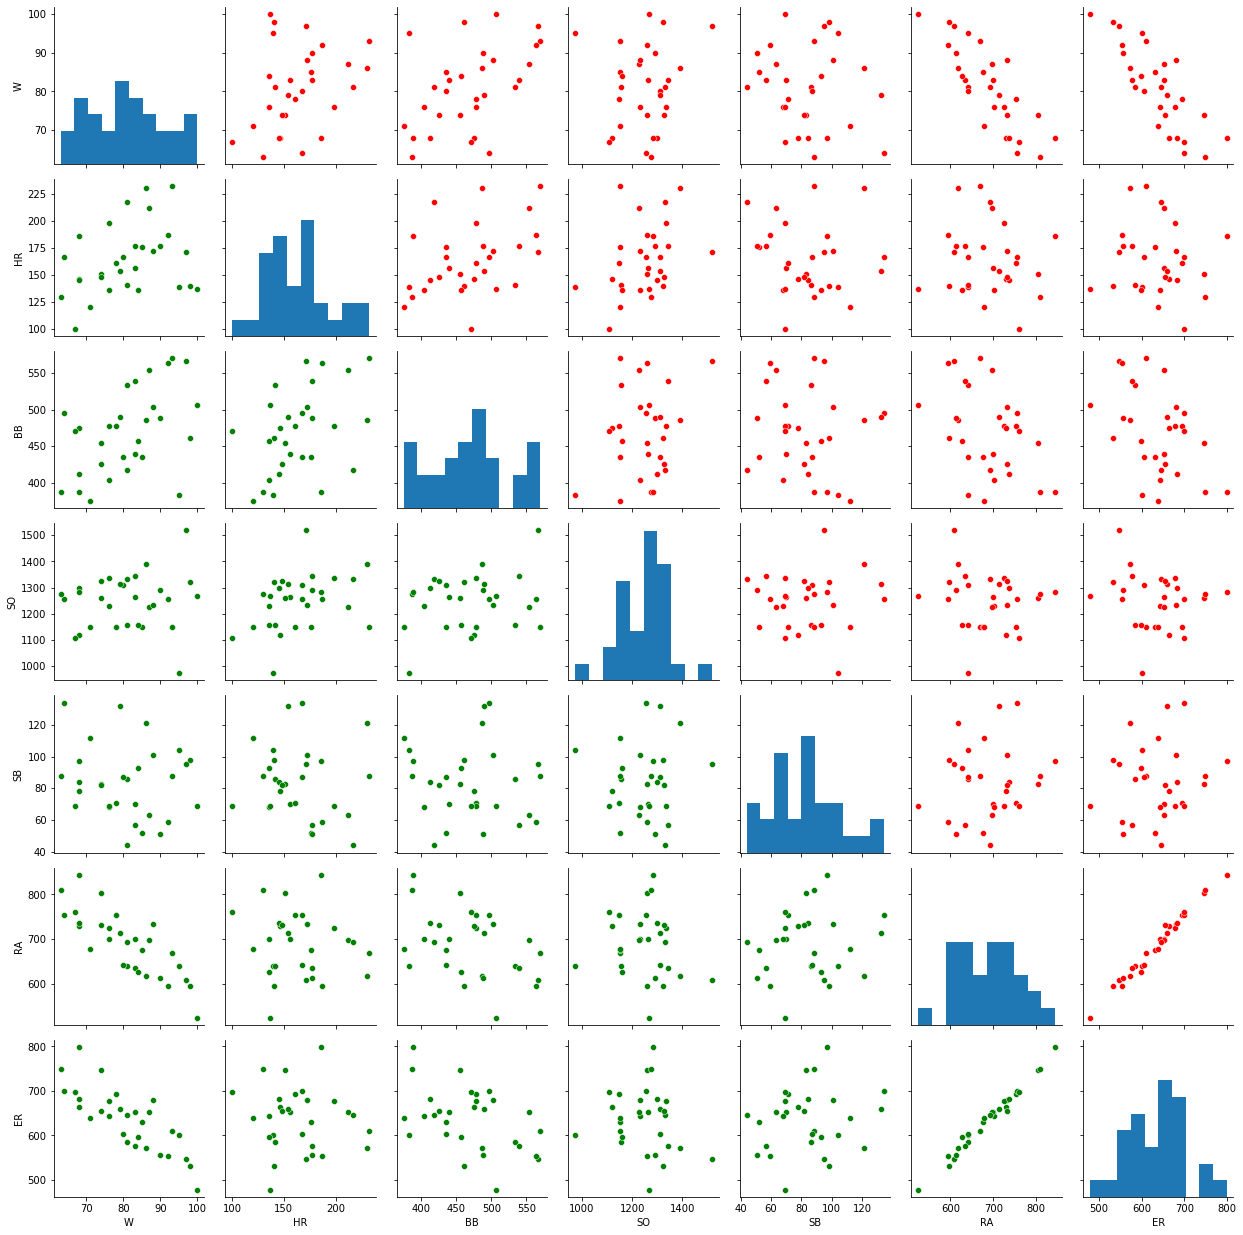

In [276]:
cols2=['W','HR', 'BB', 'SO', 'SB', 'RA', 'ER']
g = sns.PairGrid(df[cols2])
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)
plt.show()

the data points of ER and RA showing an uphill pattern as you move from left to right so it has positive relationship.
 the data points of ER and w showing an downhill pattern as you move from left to right so it has negative relationship.
 the data points of RA and w showing an downhill pattern as you move from left to right so it has negative relationship.

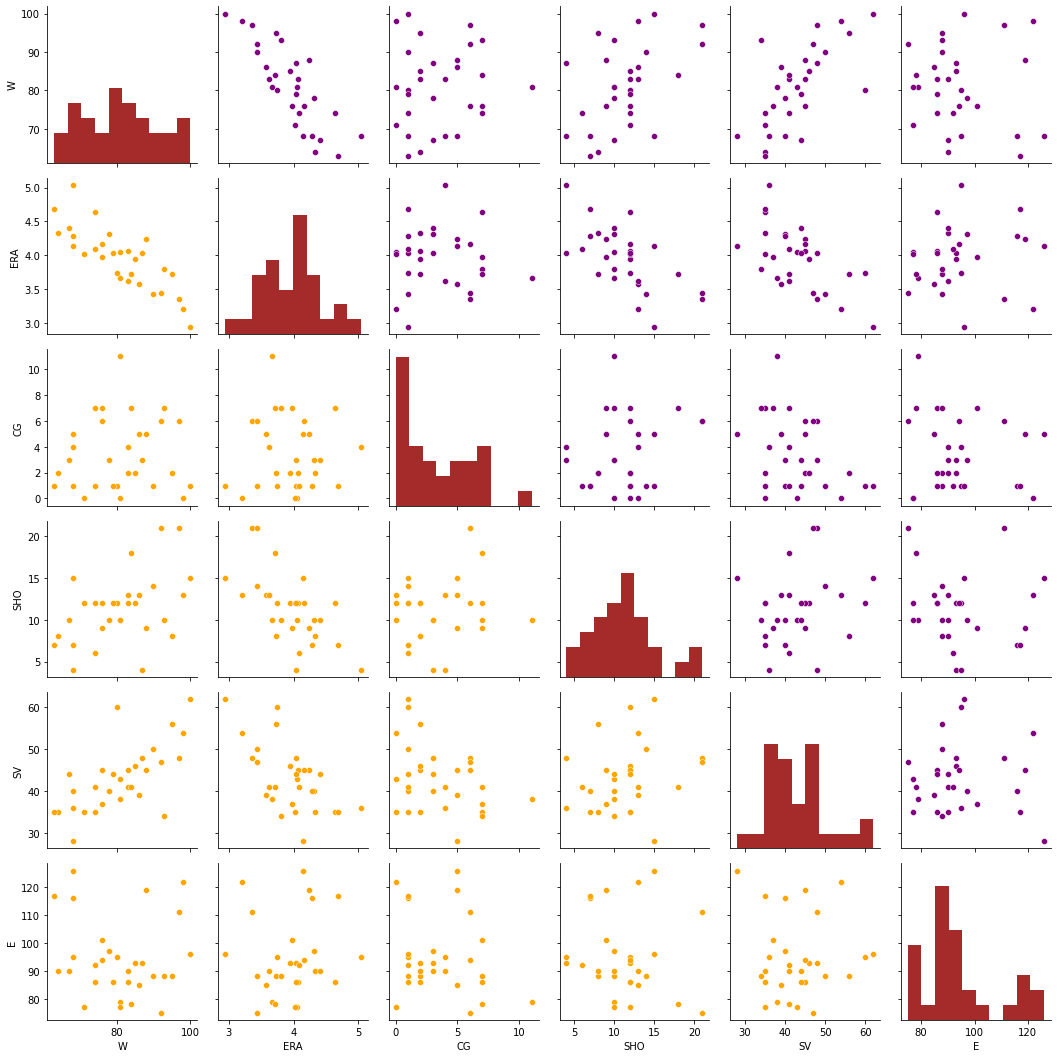

In [279]:
cols3=['W','ERA', 'CG', 'SHO', 'SV', 'E']
g = sns.PairGrid(df[cols3])
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color="orange")
g.map_diag(plt.hist,color='brown')
plt.show()

The data points of the features ERA and w showing an downhill pattern as you move from left to right so it has negative relationship.
The data points of the features SV and W showing an uphill pattern as you move from left to right so it has positive relationship.

<AxesSubplot:>

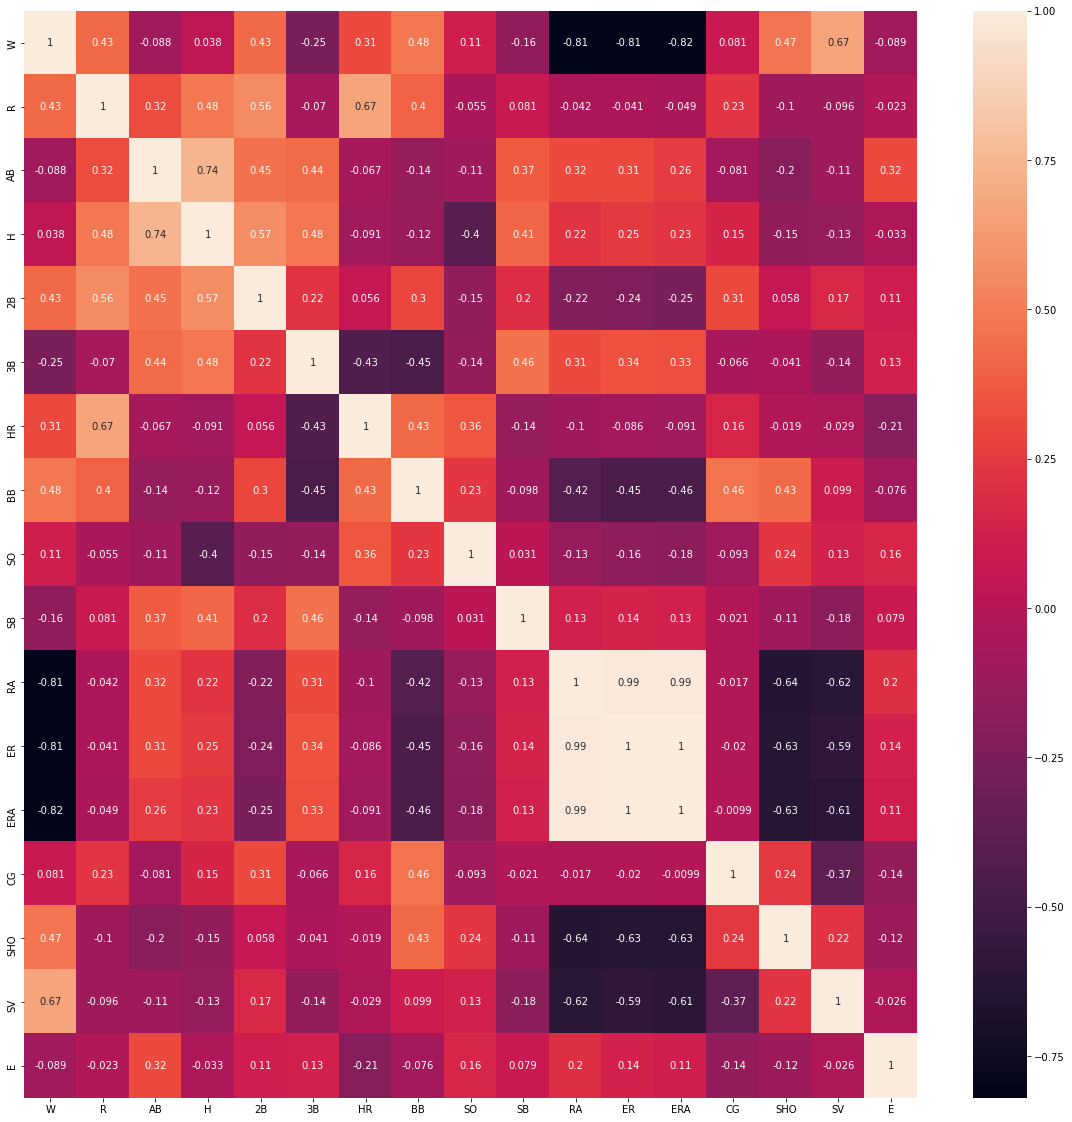

In [207]:

correlation=df.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

RA,ER,ERA features are highly negatively correlated with wins.

RA,ER,ERA features are highly negatively correlated with BB.

RA,ER,ERA features are highly negatively correlated with sv and sho.

Sho,bb,2b,SV,HR are positively correlated with win

ER andERA are posively correlated with RA

wins feature is highly and positively correlated with saves

RA,ER,ERA features are highly negatively correlated with saves.
h,cg having very less correlation with wins


__Finding whether all features which are positively correlated with Wins feature has linear relationship

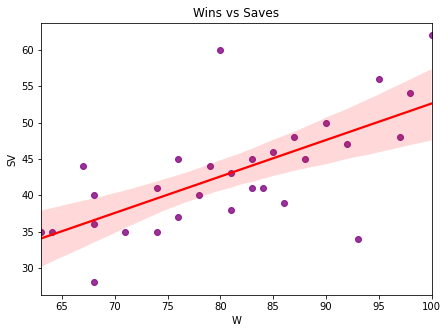

In [281]:
plt.figure(figsize=(7,5))
plt.title('Wins vs Saves')
sns.set_style="white_grid"
sns.regplot(x="W",y="SV",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})
plt.show()



In this reg plot it is apparent that SV is positively correlated with W data.most of the datapoints are  almost close to best fit line it means that the feature SV and W having linear relationship

<AxesSubplot:title={'center':'Wins vs Walks'}, xlabel='W', ylabel='BB'>

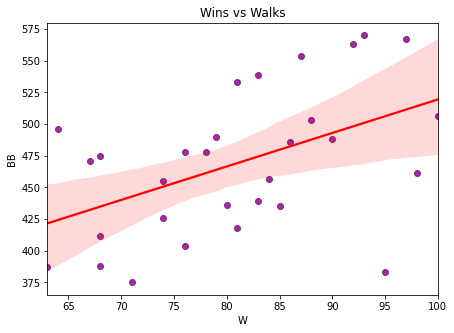

In [282]:
plt.figure(figsize=(7,5))
plt.title('Wins vs Walks')
sns.set_style="white_grid"
sns.regplot(x="W",y="BB",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})




In this reg plot it is apparent that BB is positively correlated with W data.only few datapoints are close to best fit line it means that the feature BB and W are not having linear relationship.if the value of bb is between 400 to 450 there is more chance to win

<AxesSubplot:title={'center':'Wins vs shutouts'}, xlabel='W', ylabel='SHO'>

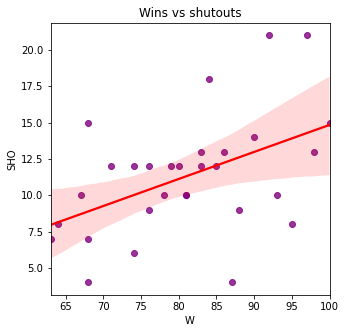

In [283]:
plt.figure(figsize=(5,5))
plt.title('Wins vs shutouts')
sns.set_style="white_grid"
sns.regplot(x="W",y="SHO",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that SHO is positively correlated with W data.only few datapoints are close to best fit line it means that the feature SHO and W are not having linear relationship

<AxesSubplot:title={'center':'Wins vs 2B'}, xlabel='W', ylabel='2B'>

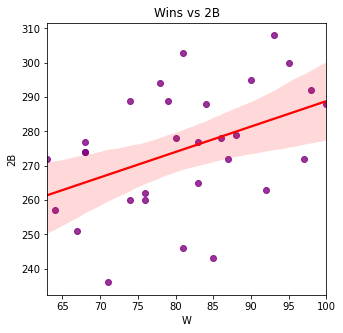

In [5]:
plt.figure(figsize=(5,5))
plt.title('Wins vs 2B')
sns.set_style="white_grid"
sns.regplot(x="W",y="2B",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that 2B is positively correlated with W data.only few datapoints are close to best fit line it means that the feature 2B and W are not having linear relationship

<AxesSubplot:title={'center':'Wins vs HR'}, xlabel='W', ylabel='HR'>

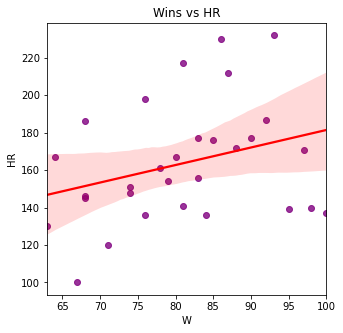

In [6]:
plt.figure(figsize=(5,5))
plt.title('Wins vs HR')
sns.set_style="white_grid"
sns.regplot(x="W",y="HR",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that HR is positively correlated with W data.only few datapoints are close to best fit line it means that the feature HR and W are not having linear relationship

___IDENTIFYING OUTLIERS

<AxesSubplot:xlabel='R'>

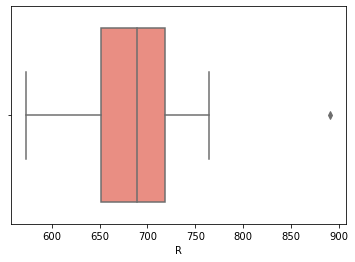

In [209]:
sns.boxplot(df['R'],color="salmon")

feature R has outlier

<AxesSubplot:xlabel='AB'>

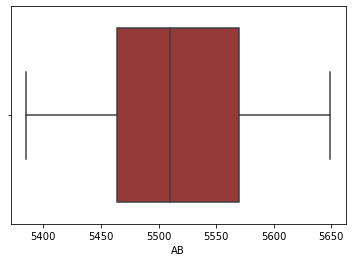

In [210]:
sns.boxplot(df['AB'],color="brown")

<AxesSubplot:xlabel='H'>

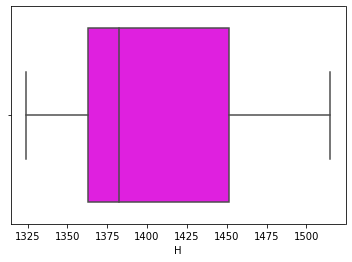

In [211]:
sns.boxplot(df['H'],color=(1,0,1))

<AxesSubplot:xlabel='2B'>

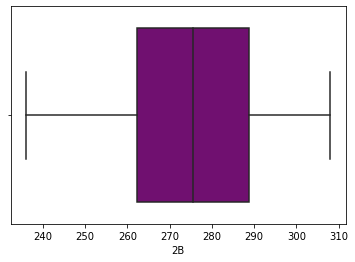

In [212]:
sns.boxplot(df['2B'],color="Purple")

<AxesSubplot:xlabel='3B'>

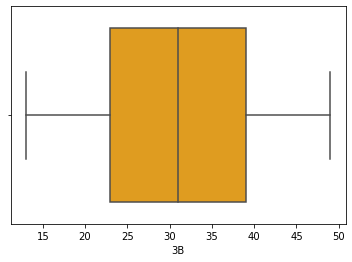

In [213]:
sns.boxplot(df['3B'],color="orange")

<AxesSubplot:xlabel='HR'>

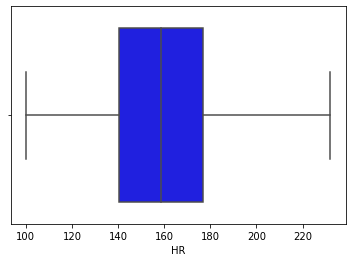

In [214]:
sns.boxplot(df['HR'],color=(0,0,1))

<AxesSubplot:xlabel='BB'>

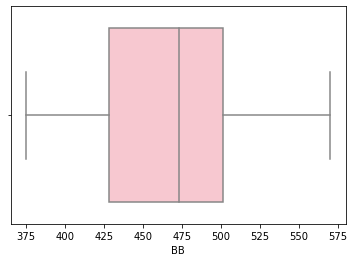

In [215]:
sns.boxplot(df['BB'],color="pink")

<AxesSubplot:xlabel='SO'>

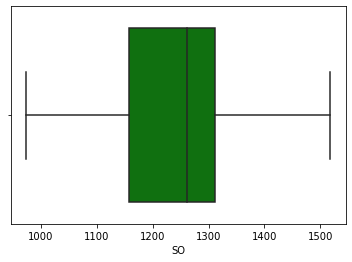

In [221]:
sns.boxplot(df['SO'],color="green")

<AxesSubplot:xlabel='SB'>

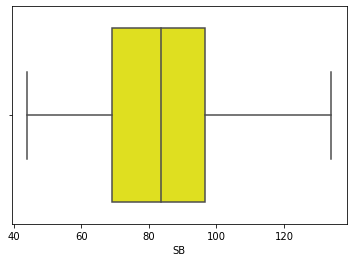

In [217]:
sns.boxplot(df['SB'],color="yellow")

<AxesSubplot:xlabel='RA'>

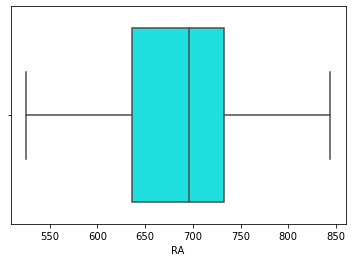

In [218]:
sns.boxplot(df['RA'],color=(0,1,1))

<AxesSubplot:xlabel='ER'>

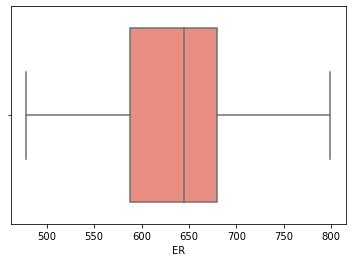

In [219]:
sns.boxplot(df['ER'],color="salmon")

<AxesSubplot:xlabel='ERA'>

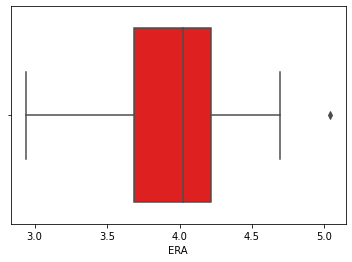

In [220]:
sns.boxplot(df['ERA'],color="red")

feature ERA has outlier

<AxesSubplot:xlabel='SHO'>

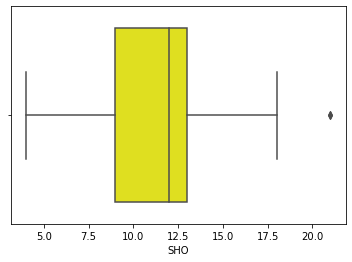

In [143]:
sns.boxplot(df['SHO'],color=(1,1,0))

feature SHO has outlier

<AxesSubplot:xlabel='SV'>

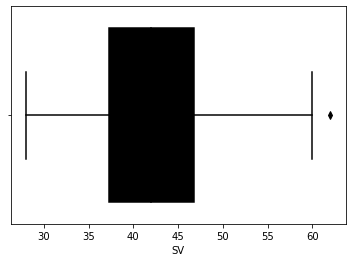

In [144]:
sns.boxplot(df['SV'],color=(0,0,0))

feature SV has outlier

<AxesSubplot:xlabel='CG'>

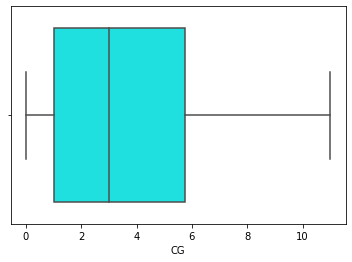

In [145]:
sns.boxplot(df['CG'],color=(0,1,1))

<AxesSubplot:xlabel='E'>

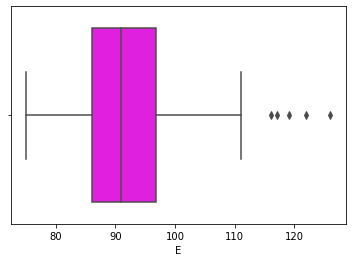

In [146]:
sns.boxplot(df['E'],color=(1,0,1))

feature E has outlier

In [7]:
z = np.abs(zscore(df))
print(np.where(z > 3))

(array([5], dtype=int64), array([1], dtype=int64))


In [8]:
data_mod = df[(z<3).all(axis=1)]
data_mod.shape

(29, 17)

In [9]:
((30-29)/30)*100

3.3333333333333335

After using z score it has only 3.3333% data loss

<AxesSubplot:xlabel='R'>

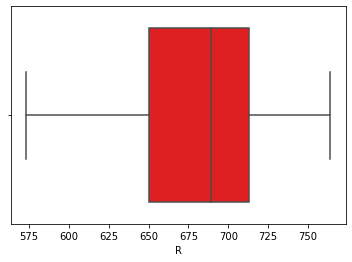

In [225]:
sns.boxplot(data_mod['R'],color="red")

<AxesSubplot:xlabel='ERA'>

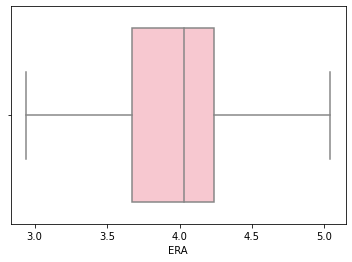

In [226]:
sns.boxplot(data_mod['ERA'],color="pink")

<AxesSubplot:xlabel='SHO'>

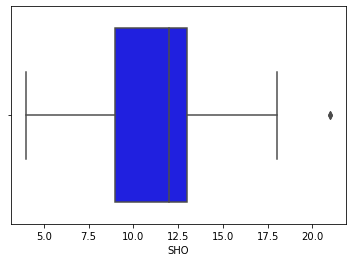

In [227]:
sns.boxplot(data_mod['SHO'],color="blue")

<AxesSubplot:xlabel='SV'>

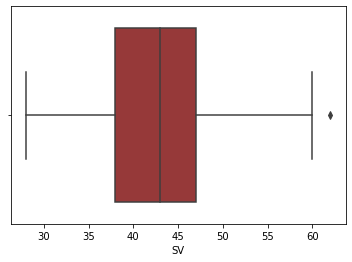

In [228]:
sns.boxplot(data_mod['SV'],color="brown")

<AxesSubplot:xlabel='E'>

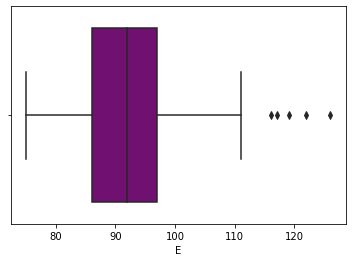

In [229]:
sns.boxplot(data_mod['E'],color="purple")

After using z_score the outliers in the features R and ERA are removed but the features SV,SHO,E are still having outliers 

In [230]:
data=df
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
df_new=data[~((data<(Q1-1.5*IQR))| (data>(Q1+1.5*IQR))).any(axis=1)]

In [26]:
df_new.shape

(6, 17)

In [27]:
((30-6)/30)*100

80.0

80% data loss so I'm choosing zscore method

___HANDLING SKEWNESS

In [10]:
for col in enumerate(list(data_mod.columns.values)):
    print(col[1],"=",data_mod[col[1]].skew())

W = 0.11901344569985461
R = -0.21536363420992782
AB = 0.16957316834729352
H = 0.7837722117274881
2B = -0.335303936110201
3B = 0.09012434653848651
HR = 0.45086158125803544
BB = 0.15119282971519954
SO = -0.2338149185462262
SB = 0.4949657663368456
RA = 0.018155177145956613
ER = 0.018460990156758887
ERA = 0.016693217783651695
CG = 0.8549795901105167
SHO = 0.5269430585305683
SV = 0.6274804879503074
E = 0.8402711976867623


the features H,CG,SHO,SV,E having skewness

In [11]:
data_clean=np.cbrt(data_mod)

In [12]:
for col in enumerate(list(data_clean.columns.values)):
    print(col[1],"=",data_clean[col[1]].skew())

W = -0.0318260355358766
R = -0.32972923511443586
AB = 0.15530070568109564
H = 0.7536959466136843
2B = -0.42378765828230225
3B = -0.30096728473928125
HR = 0.09388597676446064
BB = 0.008881526035134578
SO = -0.4982547147310651
SB = 0.07921997420293456
RA = -0.16624783966795706
ER = -0.20128937876694342
ERA = -0.22623843105649752
CG = -1.0139811466535003
SHO = -0.2981363527076689
SV = 0.2809633925573293
E = 0.671747645882412


In [13]:
data_clean.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [17]:
data_clean['E']=np.log10(data_clean['E'])

In [18]:
data_clean['E']=np.log1p(data_clean['E'])

In [19]:
data_clean['E'].skew()

0.4835086455401767

In [29]:
data_clean['H']=np.cbrt(data_clean['H'])

In [30]:
data_clean['H']=np.sqrt(data_clean['H'])

In [31]:
data_clean['H']=np.cbrt(data_clean['H'])

In [32]:
data_clean['H'].skew()

0.0

In [33]:
data_clean['CG']=np.exp(data_clean['CG'])

In [34]:
data_clean['CG'].skew()

0.3457596073807261

In [35]:
for col in enumerate(list(data_clean.columns.values)):
    print(col[1],"=",data_clean[col[1]].skew())

W = -0.0318260355358766
R = -0.32972923511443586
AB = 0.15530070568109564
H = 0.0
2B = -0.42378765828230225
3B = -0.30096728473928125
HR = 0.09388597676446064
BB = 0.008881526035134578
SO = -0.4982547147310651
SB = 0.07921997420293456
RA = -0.16624783966795706
ER = -0.20128937876694342
ERA = -0.22623843105649752
CG = 0.3457596073807261
SHO = -0.2981363527076689
SV = 0.2809633925573293
E = 0.4835086455401767


Skewness is completely removed

In [712]:
data_clean.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:xlabel='SV'>

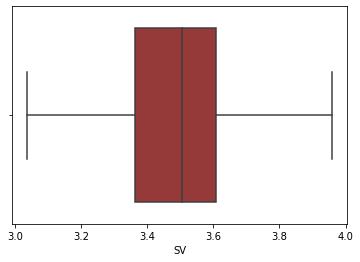

In [629]:
sns.boxplot(data_clean['SV'],color="brown")

after removing skewness the outliers in the feature SV is removed

<AxesSubplot:xlabel='SHO'>

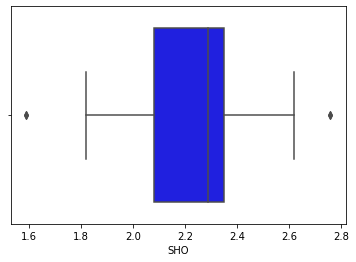

In [660]:
sns.boxplot(data_clean['SHO'],color="blue")

<AxesSubplot:xlabel='E'>

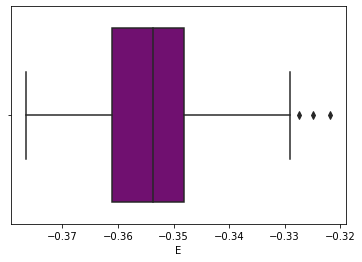

In [675]:
sns.boxplot(data_clean['E'],color="purple")

After removing skewness the outliers in the feature  SV is removed.The features SHO and E are still having outliers

In [36]:
z1 = np.abs(stats.zscore(data_clean['E']))
print(z1)

[0.41975371 0.58882229 1.22604264 0.56398985 0.58882229 0.01920796
 1.42259731 0.13284783 0.28059322 1.67312865 0.67539744 0.01920796
 0.05737266 2.04499338 0.20724565 1.83600817 1.21030234 1.50462481
 0.25587978 0.41975371 0.25587978 1.42259731 0.25587978 1.56143906
 1.6263584  1.32344762 0.58882229 0.0969232  0.13284783]


In [38]:
data_clean['E'] = data_clean[(z1<3)]
data_clean.shape

(29, 17)

<AxesSubplot:xlabel='E'>

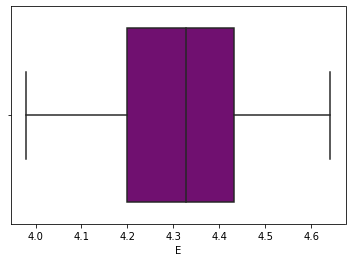

In [39]:
sns.boxplot(data_clean['E'],color="purple")

Using zscore the outliers in the feature E is completely removed and the data loss after removing outlier is 3.333333%

In [40]:
z2 = np.abs(stats.zscore(data_clean['SHO']))
print(z2)

[0.75600102 0.27462951 0.20607206 0.47082925 0.27462951 2.22523123
 0.20607206 0.27462951 0.20607206 0.47082925 0.4950723  0.27462951
 0.27462951 0.90414102 0.90414102 0.4950723  1.94646424 1.06604577
 0.75600102 0.70448114 0.4950723  0.27462951 0.20607206 1.06604577
 1.94646424 1.45440695 0.27462951 1.40721923 2.22523123]


In [41]:
data_clean['SHO'] = data_clean[(z2<3)]
data_clean.shape

(29, 17)

<AxesSubplot:xlabel='SHO'>

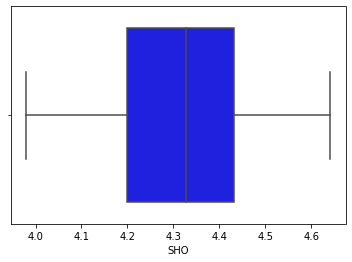

In [205]:
sns.boxplot(data_clean['SHO'],color="blue")

Using zscore the outliers in the feature SHO is completely removed and the data loss after removing outlier is 3.333333%

___outliers are removed using zscore and skewness is removed by using log1p,exp,and cbrt transformation

In [42]:
data_clean.shape

(29, 17)

In [43]:
((30-29)/30)*100

3.3333333333333335

After removing outliers and skewness the data loss is 3.3333333333333335

In [59]:
data1=data_clean

In [60]:
x1=data1.drop('W',axis=1)
y1=data1['W']

___feature scaling
transforming un scaled data into scaled data using min max scalining technique

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

___MODELING

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [63]:
x=scaled
y=y1

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [65]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.053028329990761125
Mean squared error 0.005678962014003077
Root Mean squared error 0.07535888808895125
R2 Score 0.8400735193637974
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.07584103654488272
Mean squared error 0.012154531439757284
Root Mean squared error 0.1102475915372181
R2 Score 0.6577136046782146
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.058155566628723565
Mean squared error 0.005581901431226013
Root Mean squared error 0.07471212372316834
R2 Score 0.8428068634808665
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.1102230246251565e-16
Mean squared error 9.860761315262648e-32
Root Mean squared error 3.1401849173675503e-16
R2 Score 1.0
----------

___cross validation

In [66]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scores

array([0.45310249, 0.26282058, 0.63793879, 0.56785308, 0.93485107])

In [67]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scores

array([0.46617594, 0.0481677 , 0.41275989, 0.00859675, 0.69160099])

In [68]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scores

array([ 0.91660924, -0.21270402,  0.90913196,  0.83927385,  0.83550014])

In [69]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scores

array([1., 1., 1., 1., 1.])

In [70]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scores

array([-0.18821621, -1.027922  , -0.10434001, -0.88510148, -0.02165797])

In [71]:
from sklearn.model_selection import cross_val_score
rid=Ridge()
scores=cross_val_score(rid,x,y,scoring='r2',cv=5)
scores

array([0.87112539, 0.48245766, 0.90545474, 0.87923066, 0.98371698])

In [72]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scores

array([0.95287737, 0.64347892, 0.87927574, 0.83374584, 0.97725089])

In [73]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scores

array([0.94679003, 0.89292529, 0.93345306, 0.88595921, 0.94422735])

In [225]:
  0.93485107-0.8400735193637974(kNeighbourRegressor)

0.09477755063620263

In [226]:
0.6577136727748196-0.69160091(Svr)

-0.03388723722518039

In [227]:
 0.9268621895148621-0.82057622 (decisionTreeRegressor)

0.10628596951486213

In [230]:
1-1(LinearRegression)

0

In [76]:
0.98371698- 0.9627207927349124

0.020996187265087563

In [75]:
0.97725089-0.9301491191898729(randomforest)

0.04710177081012712

In [74]:
0.9603683562451526-0.94422735

0.016141006245152578

I have not found the difference for lasso model because it has negative value.I have found difference of predicted model with cross validation to avoid overfitting of data.
In the above process linear regression model has zero difference but it hae high absolute mean error and root mean squarred error value.So I'm selecting gradient boosting regressor as best model because it has second least difference(0.01644192) and it has very less error values compare to linear regression model

___Hyper tuning

In [270]:
from sklearn.model_selection import GridSearchCV

parameters = {"learning_rate": [0.01, 0.1],
               "n_estimators": [10, 100,500,1000],
               "max_depth": [3, 5, 8]
              
                    }

grid = GridSearchCV(GradientBoostingRegressor(), param_grid = parameters, scoring = "r2")

In [271]:
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)


Best_parameters {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}


In [272]:
print(grid.best_estimator_)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)


In [77]:
x=scaled
y=y1

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=1000)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)
     

Accuracy 0.9616920174672294
Mean absolute error 0.03130392631023349
Mean squared error 0.001360309917227371
Root Mean squared error 0.03688237949519216
r2 score 0.9616920174672294


It is apparent that  after hyper tuning the accuracy is slightly increased to  __0.9618692451521637.


_Best model:Gradient Boosting Regressor
_Best parameter: learning_rate: 0.01, 'max_depth': 3, n_estimators: 1000


model Saving

In [79]:
from joblib import dump
dump(model, 'model_baseball.joblib')

['model_baseball.joblib']

In [80]:
from joblib import load
loaded = load('model_baseball.joblib')